### Imports

In [2]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(str(Path.cwd().parents[0]))
from functions import *

### Set Save File Name

In [3]:
save_path = Path.cwd() / "Plots"
if not save_path.exists():
    save_path.mkdir()

### Get the Data Paths

In [4]:
# Get the lists of file paths
jump_combined = getFilePaths(Path.cwd(), header="Select the File", verbose=True)

In [5]:
# Get the list of dataframes from the lists of file paths
raw_dfs = readCSVFiles(jump_combined)
raw_dfs[0].head()

,Unnamed:0,Time,Reward,Input,RodPos,RodVel,ActPos,ActVel,Time.1,Reward.1,...,RodVel.3,ActPos.3,ActVel.3,Time.4,Reward.4,Input.4,RodPos.4,RodVel.4,ActPos.4,ActVel.4
0,0,0.00,0.000000,0.0,-0.002006,0.000000,0.004,0.0,0.00,0.000000,...,0.000000,0.004,0.0,0.00,0.000000,0.0,-0.002006,0.000000,0.004,0.0
1,1,0.01,-0.003080,10.0,-0.003090,-0.108330,0.005,0.1,0.01,-0.001463,...,-0.104101,0.005,0.1,0.01,-0.003175,10.0,-0.003185,-0.117851,0.005,0.1
2,2,0.02,-0.001610,10.0,-0.004843,-0.175369,0.007,0.2,0.02,-0.002230,...,-0.166593,0.007,0.2,0.02,-0.001712,10.0,-0.005150,-0.196568,0.007,0.2
3,3,0.03,-0.001098,10.0,-0.006607,-0.176404,0.008,0.3,0.03,-0.002799,...,-0.163043,0.008,0.3,0.03,-0.001206,10.0,-0.007258,-0.210734,0.008,0.3
4,4,0.04,-0.001142,0.0,-0.006871,-0.026419,0.008,0.3,0.04,-0.002001,...,-0.010049,0.008,0.3,0.04,-0.001324,0.0,-0.007968,-0.070981,0.008,0.3


### Average the data in Data Paths

In [6]:
# get the list of average and std for all the dataframes
unique_headers = ['Time', 'Reward', 'Input', 'RodPos', 'RodVel', 'ActPos',
       'ActVel']

jc_dfs_parsed = []
for df in raw_dfs:
    jc_dfs_parsed.append(parseDataFrame(df, unique_headers))

In [7]:
# remove all the agents who never got off the ground
agent_index = 0
for agent_type in jc_dfs_parsed:
    for column in agent_type["RodPos"]:
        if np.max(agent_type["RodPos"][column]) < 0:
            # get index of series within the dataframe
            index = agent_type["RodPos"].columns.get_loc(column)
            # get index of agent
            # agent_index = jc_dfs_parsed.index(agent_type)
            print(agent_index, index)
            # remove the series from all dataframes
            for df in jc_dfs_parsed[agent_index]:
                jc_dfs_parsed[agent_index][df].drop(agent_type[df].columns[index], axis=1, inplace=True)
                
    agent_index += 1


### Plot 2 Average/STD Timeseries

Average Effective Height: 6.0000494003295906
Average Height Height: 5.999998474121094
Percent Difference: -0.0008487631534108966


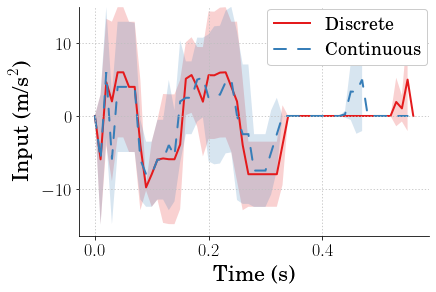

In [23]:
jump_type = 'hei'
plot_type = 'Input'

X_1_MEAN, X_1_STD = dfAverageStd(jc_dfs_parsed[0]["Time"])
Y_1_MEAN, Y_1_STD = dfAverageStd(jc_dfs_parsed[0][plot_type])
avg_eff_height = np.max(Y_1_MEAN)
print(f"Average Effective Height: {avg_eff_height}")

X_2_MEAN, X_2_STD = dfAverageStd(jc_dfs_parsed[1]["Time"])
Y_2_MEAN, Y_2_STD = dfAverageStd(jc_dfs_parsed[1][plot_type])
avg_hei_height = np.max(Y_2_MEAN)
print(f"Average Height Height: {avg_hei_height}")

percent_diff = ((avg_hei_height - avg_eff_height) / avg_eff_height) * 100
print(f"Percent Difference: {percent_diff}")

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r"Input ($\textup{m/s}^2$)", fontsize=22, weight='bold', labelpad=10)
# plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)

plt.plot(X_1_MEAN, Y_1_MEAN, linewidth=2, linestyle='-', label="Discrete")
plt.fill_between(X_1_MEAN, Y_1_MEAN-Y_1_STD, Y_1_MEAN+Y_1_STD, alpha=0.2)
plt.plot(X_2_MEAN, Y_2_MEAN, linewidth=2, linestyle='--', label="Continuous")
plt.fill_between(X_2_MEAN, Y_2_MEAN-Y_2_STD, Y_2_MEAN+Y_2_STD, alpha=0.2)
        
# uncomment below and set limits if needed
# plt.xlim(0,1.25)
plt.ylim(bottom=None, top=15)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = save_path / f'avg_{jump_type}_{plot_type}_.svg'
plt.savefig(filename, transparent=True)
filename = save_path / f'avg_{jump_type}_{plot_type}_.png'
plt.savefig(filename, transparent=True)
plt.show()

### Plot 3 Average Timeseries/STD

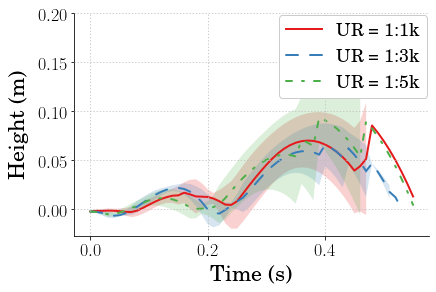

In [39]:
jump_type = 'hei'
plot_type = 'RodPos'

X_1_MEAN, X_1_STD = dfAverageStd(jc_dfs_parsed[0]["Time"])
Y_1_MEAN, Y_1_STD = dfAverageStd(jc_dfs_parsed[0][plot_type])

X_2_MEAN, X_2_STD = dfAverageStd(jc_dfs_parsed[1]["Time"])
Y_2_MEAN, Y_2_STD = dfAverageStd(jc_dfs_parsed[1][plot_type])

X_3_MEAN, X_3_STD = dfAverageStd(jc_dfs_parsed[2]["Time"])
Y_3_MEAN, Y_3_STD = dfAverageStd(jc_dfs_parsed[2][plot_type])

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
# fig = plt.figure(figsize=(9,6))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
# plt.ylabel(r"Input ($\textup{m/s}^2$)", fontsize=22, weight='bold', labelpad=10)
plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)

plt.plot(X_1_MEAN, Y_1_MEAN, linewidth=2, linestyle='-', label="UR = 1:1k")
plt.fill_between(X_1_MEAN, Y_1_MEAN-Y_1_STD, Y_1_MEAN+Y_1_STD, alpha=0.2)
plt.plot(X_2_MEAN, Y_2_MEAN, linewidth=2, linestyle='--', label="UR = 1:3k")
plt.fill_between(X_2_MEAN, Y_2_MEAN-Y_2_STD, Y_2_MEAN+Y_2_STD, alpha=0.2)
plt.plot(X_3_MEAN, Y_3_MEAN, linewidth=2, linestyle='-.', label="UR = 1:5k")
plt.fill_between(X_3_MEAN, Y_3_MEAN-Y_3_STD, Y_3_MEAN+Y_3_STD, alpha=0.2)
        
# uncomment below and set limits if needed
# plt.xlim(0,1.25)
# plt.ylim(bottom=-12, top=25)
plt.ylim(bottom=None, top=.2)
# plt.ylim(bottom=None, top=.125)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = save_path / f'avg_{jump_type}_{plot_type}_.svg'
# plt.savefig(filename, transparent=True)
# filename = save_path / f'avg_{jump_type}_{plot_type}_.png'
# plt.savefig(filename, transparent=True)
plt.show()

### Find the Best Agents

In [8]:
max_rew = 0
agents = []
agent_indices = []
for jump_type in jc_dfs_parsed:
    for column in jump_type["Reward"]:
        if np.max(jump_type["Reward"][column]) > max_rew:
            max_rew = np.max(jump_type["Reward"][column])
            agent_col = column
            # get the index of the agent
            agent_index = jump_type["Reward"].columns.get_loc(agent_col)
    agents.append(agent_col)
    agent_indices.append(agent_index)

### Plot Best Agents

Max Efficient Height: 10.0
Max Height Height: 10.0
Percent Difference: 0.0


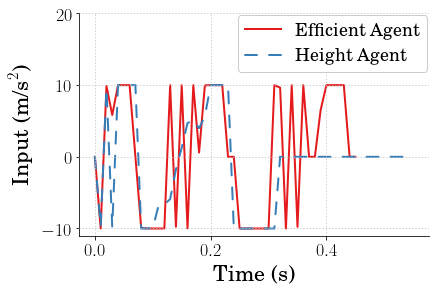

In [10]:
jump_type = 'Stutter'
plot_type = 'Input'

Y_1 = jc_dfs_parsed[0][plot_type].iloc[:, agent_indices[0]]
X_1 = jc_dfs_parsed[0]["Time"].iloc[:, agent_indices[0]]
eff_maX_2ght = np.max(Y_1)
print(f"Max Efficient Height: {eff_maX_2ght}")

Y_2 = jc_dfs_parsed[1][plot_type].iloc[:, agent_indices[1]]
X_2 = jc_dfs_parsed[1]["Time"].iloc[:, agent_indices[1]]
hei_maX_2ght = np.max(Y_2)
print(f"Max Height Height: {hei_maX_2ght}")

percent_diff = ((hei_maX_2ght - eff_maX_2ght) / eff_maX_2ght) * 100
print(f"Percent Difference: {percent_diff}")

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r"Input ($\textup{m/s}^2$)", fontsize=22, weight='bold', labelpad=10)
# plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)

plt.plot(X_1, Y_1, linewidth=2, linestyle='-', label="Efficient Agent")
plt.plot(X_2, Y_2, linewidth=2, linestyle='--', label="Height Agent")
        
# uncomment below and set limits if needed
# plt.xlim(0,1.25)
# plt.ylim(bottom=None, top=0.175)
plt.ylim(bottom=None, top=20)


# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = save_path / f'best_{jump_type}_{plot_type}_.svg'
plt.savefig(filename, transparent=True)
filename = save_path / f'best_{jump_type}_{plot_type}_.png'
plt.savefig(filename, transparent=True)
plt.show()

### Create Max Height and Power Used Data

In [48]:
heights_combined = []

for agent_type in jc_dfs_parsed:
    heights = []
    for column in agent_type["RodPos"]:
        max_h = np.max(agent_type["RodPos"][column])
        heights.append(max_h)
    heights_combined.append(heights)

powers_combined = []
for agent_type in jc_dfs_parsed:
    acc = agent_type["Input"]
    vel = agent_type["ActVel"]
    mass = 1.003
    power = acc.to_numpy() * vel.to_numpy() * mass
    # sum power along the columns
    power_summed = np.nansum(power, axis=0)
    powers_combined.append(np.abs(power_summed))

### Plot the Height vs Power Used Scatter Plot

Average Efficient Power Used: 10.239957601834533
Average Height Power Used: 13.945242820305936
Percent Difference: 36.18457578191129


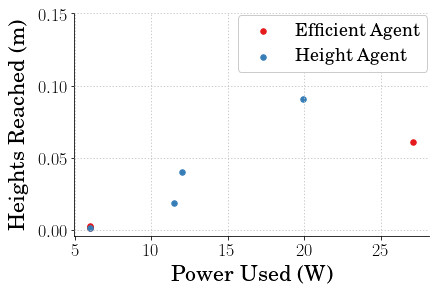

In [49]:
# Create a scatter plot of the heights and power used
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Power Used (W)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r"Heights Reached (m)", fontsize=22, weight='bold', labelpad=10)

# plot the data
plt.scatter(powers_combined[0], heights_combined[0], label="Efficient Agent", s=30)
plt.scatter(powers_combined[1], heights_combined[1], label="Height Agent", s=30)
avg_eff_power_used = np.mean(powers_combined[0])
avg_hei_power_used = np.mean(powers_combined[1])
percent_diff = ((avg_hei_power_used - avg_eff_power_used) / avg_eff_power_used) * 100
print(f"Average Efficient Power Used: {avg_eff_power_used}")
print(f"Average Height Power Used: {avg_hei_power_used}")
print(f"Percent Difference: {percent_diff}")

# uncomment below and set limits if needed
# plt.xlim(0,8)
plt.ylim(bottom=None, top=0.15)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = save_path / 'Stutter_HeightVsPower.svg'
# plt.savefig(filename, transparent=True)
# filename = save_path / 'Stutter_HeightVsPower.png'
# plt.savefig(filename, transparent=True)
plt.show()

### Best Agent Power Used

In [50]:
eff_power_used = powers_combined[0][agent_indices[0]]
hei_power_used = powers_combined[1][agent_indices[1]]
percent_diff = ((hei_power_used - eff_power_used) / eff_power_used) * 100

print(f"Max Efficient Power Used: {eff_power_used}")
print(f"Max Height Power Used: {hei_power_used}")
print(f"Percent Difference: {percent_diff}")

Max Efficient Power Used: 27.127788774400898
Max Height Power Used: 20.230354841387957
Percent Difference: -25.42571379618561
